# Real-world Data Wrangling

## 1. Gather data

### **1.1.** Problem Statement: Offstreet Parking Situation in the City of Heidelberg
The City of Heidelberg in Germany collects data about the off-streetparking in their parking garages and provides them to the public on their data platform, accessible via the link: https://ckan.datenplattform.heidelberg.de/de/dataset/mobility_main_parking. The data is provided in CSV files or via an API in JSON-Format.

In my project I want to compare the parking garage capacity utilization of two different garages P01 and P07 during an exemplary week. I have chosen P1 and P7, as the garages are of similar size, but serve different areas of the city. 

### **1.2.** Gathering two datasets about P01 "Poststraße" and P07 "Kaufhof"

In [67]:
#import statements
import pandas as pd
import numpy as np
import json
import requests
import seaborn as sns
import matplotlib.pyplot as plt

#### **Dataset 1: Offstreet Parking at P07 Kaufhof in the City of Heidelberg**

Type: CSV File

Method: The data was gathered by importing a CSV from the data platform of the city of Heidelberg-Germany about offstreetparking. The dataset contains time series data and information about the parking house "P7 - Kaufhof". 

Dataset variables:

 * _id
 * recvTime: Time the data row was received by the system
 * fiwareServicePath: System information
 * entityId 
 * entityType: Type of Parking
 * areaServed: Area in the City, where the garage is located
 * maximumAllowedWidth: Maximum Width of vehicles
 * latitude: Coordinates of the garage
 * description: Tendency of utilisation
 * alternateName: Name without P-number
 * observationDateTime: Timestamp of data
 * totalAvailableSpotNumber: Number of parking slots in the garage, that are not out of service
 * occupiedSpotNumber: Number of occupied parking slots
 * availableSpotNumber: Free parking slots in the garage  
 * name: Name with P-number 
 * maximumAllowedHeight: Maximum height of the vehicle to enter the garage
 * totalSpotNumber: Number of parking slots in the garage
 * aggregateRating: Rating of the garage
 * outOfServiceSlotNumber: Number of parking slots, that are out of service
 * longitude: Coordinates of the garage
 * status: info, whether garage is occupied or further spaces are available at observationDateTime

In [68]:
#import CSV about P0 Am Bismarckplatz in and from the city of Heidelberg
p07_hist_data=pd.read_csv("https://ckan.datenplattform.heidelberg.de/de/datastore/dump/f92d8996-481a-47b8-b6e0-a85cee2a6378?bom=True")
#Show first 5 rows of data
p07_hist_data.head()

,_id,recvTime,fiwareServicePath,entityId,entityType,areaServed,maximumAllowedWidth,latitude,description,alternateName,...,totalAvailableSpotNumber,occupiedSpotNumber,availableSpotNumber,name,maximumAllowedHeight,totalSpotNumber,aggregateRating,outOfServiceSlotNumber,longitude,status
0,1,2022-10-28T10:11:30.907Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,constant,Kaufhof,...,471,146,325,P7 Kaufhof,215,305,30.997877,-166,8.696387,spacesAvailable
1,2,2022-10-28T10:12:30.760Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,constant,Kaufhof,...,471,147,324,P7 Kaufhof,215,305,31.210191,-166,8.696387,spacesAvailable
2,3,2022-10-28T10:13:30.995Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,constant,Kaufhof,...,471,148,323,P7 Kaufhof,215,305,31.422505,-166,8.696387,spacesAvailable
3,4,2022-10-28T10:14:30.625Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,constant,Kaufhof,...,471,147,324,P7 Kaufhof,215,305,31.210191,-166,8.696387,spacesAvailable
4,5,2022-10-28T10:15:31.95Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,constant,Kaufhof,...,471,145,326,P7 Kaufhof,215,305,30.785563,-166,8.696387,spacesAvailable


#### Dataset 2: Offstreet Parking at P1 Poststrasse in the City of Heidelberg

Type: API, JSON

Method: The data was gathered using the API of the data platform of Heidelberg in JSON-Format and then converted into a pandas dataframe. 
I do not explain the variables in detail here, as they coincide with the variables of P7 and are described above. The API provides a lot of additional fields, that contain only NULL-Values. The variables, which are relevant for the further analysis coincide with the dataset about P7, where they are described in detail and are marked in bold letters.

Dataset variables:
* acceptedPaymentMethod
* addressCountry
* addressLocality
* **aggregateRating**
* **alternateName**
* **areaServed**
* **availableSpotNumber**
* chargingStations
* closingHours
* contactPointEMail
* contactPointTelephone
* dayEnd
* dayStart
* **description**
* district
* facilities
* familyParkingSpots
* forbiddenVehicleType
* fullParkingSiteId
* goodwillPeriodInMinutes
* googlePlaceId
* handicappedParkingSpots
* highestFloor
* images
* **lat: Latitude**
* location
* location_centroid
* **lon: Longitude**
* lowestFloor
* **maximumAllowedHeight**
* **maximumAllowedWidth**
* maximumParkingDuration
* **name**
* numberOfPayingStations
* **observationDateTime**
* **occupiedSpotNumber**
* openingHours
* **outOfServiceSlotNumber**
* parkingSiteId
* parking_type
* postalCode
* priceModelValidFor24h
* prices
* provider
* specialLocation
* staticName
* staticParkingSiteId
* staticStatus
* staticTotalSpotNumber
* **status**
* streetAddress
* streetAddressDriveway
* streetAddressExit
* totalAvailableSpotNumber
* **totalSpotNumber**
* trend
* website
* womenParkingSpots

Let's reqest the data from the API for a selected week in July 2023: 

In [69]:
#Variables for specification of the garage number and start- and endtime of the dataset 
start_time='2023-07-10T00:00:00.000'
end_time='2023-07-17T00:00:00.000'
parking_garage='P01'

#API request code
book=requests.get(f"https://api.datenplattform.heidelberg.de/ql/mobility/main/parking/v2/entities/urn:ngsiv2:OffStreetParking:{parking_garage}?fromDate={start_time}Z&toDate={end_time}Z&api-key=00224a2e-01d1-4458-ac55-29674ec2d682"
                 , headers={"X-Gravitee-Api-Key":"00224a2e-01d1-4458-ac55-29674ec2d682"})

#Check status of the request
book.raise_for_status()

#Read JSON-data received by the API 
json_data=book.json()

#Show Results
print(json_data)

{'attributes': [{'attrName': 'acceptedPaymentMethod', 'values': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,

To make it easier to work with the data contained in the JSON-File, let's convert it to a Pandas Dataframe.

In [70]:
#Convert json data to Pandas dataframe
text_json_data = json.loads(book.text)
df_json_data = pd.DataFrame(text_json_data['attributes'])

#Split List in column 'values' into multiple columns
df_json_data_clean=pd.DataFrame(df_json_data['values'].values.tolist())
df_json_data_clean['attrName']=df_json_data['attrName']

#Transpose table
df_json_data_clean=df_json_data_clean.set_index('attrName').T

#Show first 20 rows
p01_hist_data=df_json_data_clean
p01_hist_data.head()

attrName,acceptedPaymentMethod,addressCountry,addressLocality,aggregateRating,alternateName,areaServed,availableSpotNumber,chargingStations,closingHours,contactPointEMail,...,staticTotalSpotNumber,status,streetAddress,streetAddressDriveway,streetAddressExit,totalAvailableSpotNumber,totalSpotNumber,trend,website,womenParkingSpots
0,None,None,None,2.083333,Poststraße,Zentrum,517.0,None,None,None,...,None,spacesAvailable,None,None,None,528.0,592.0,None,None,None
1,None,None,None,2.083333,Poststraße,Zentrum,517.0,None,None,None,...,None,spacesAvailable,None,None,None,528.0,592.0,None,None,None
2,None,None,None,2.083333,Poststraße,Zentrum,517.0,None,None,None,...,None,spacesAvailable,None,None,None,528.0,592.0,None,None,None
3,None,None,None,2.083333,Poststraße,Zentrum,517.0,None,None,None,...,None,spacesAvailable,None,None,None,528.0,592.0,None,None,None
4,None,None,None,2.083333,Poststraße,Zentrum,517.0,None,None,None,...,None,spacesAvailable,None,None,None,528.0,592.0,None,None,None


In [122]:
#Save raw datasets as CSV
p01_hist_data.to_csv('parking_hist_data_P01_raw.csv', index=False, encoding='utf-8')
p07_hist_data.to_csv('parking_hist_data_P07_raw.csv', index=False, encoding='utf-8')

## 2. Assess data

In the datasets P1 and P7 several issues have to be cleaned before starting with the visualizations of the data and computing statistics.
 
* Quality Issue 1: NULL-Values in several columns in P01-Dataset
* Quality Issue 2: Deviating rows with status "Offen"
* Quality Issue 3: Duplicates
* Tidiness Issue 2: Inconsistent Time Window
* Tidiness Issue 2: Mixed Observations Range: Parking Garage and Time Series Data

### Quality Issue 1: NULL-Values in several columns in P01-Dataset
In the P01 Dataset there are very many columns, containing only NULL-Values. Columns, which only contain NULL-Values can be dropped at all.

#### P01-Dataset
I start assessing the P01-Dataset that was retrieved via the API in a JSON format and converted to a Dataframe. To get a first impression about the dataset, let's have a look at the shape and the first 20 rows.

In [71]:
# Show number of rows and columns contained in the dataset
p01_hist_data.shape

(2666, 58)

In [72]:
#Inspect first 20 rows of the Daframe about P01
p01_hist_data.head(20)

attrName,acceptedPaymentMethod,addressCountry,addressLocality,aggregateRating,alternateName,areaServed,availableSpotNumber,chargingStations,closingHours,contactPointEMail,...,staticTotalSpotNumber,status,streetAddress,streetAddressDriveway,streetAddressExit,totalAvailableSpotNumber,totalSpotNumber,trend,website,womenParkingSpots
0,None,None,None,2.083333,Poststraße,Zentrum,517.0,None,None,None,...,None,spacesAvailable,None,None,None,528.0,592.0,None,None,None
1,None,None,None,2.083333,Poststraße,Zentrum,517.0,None,None,None,...,None,spacesAvailable,None,None,None,528.0,592.0,None,None,None
2,None,None,None,2.083333,Poststraße,Zentrum,517.0,None,None,None,...,None,spacesAvailable,None,None,None,528.0,592.0,None,None,None
3,None,None,None,2.083333,Poststraße,Zentrum,517.0,None,None,None,...,None,spacesAvailable,None,None,None,528.0,592.0,None,None,None
4,None,None,None,2.083333,Poststraße,Zentrum,517.0,None,None,None,...,None,spacesAvailable,None,None,None,528.0,592.0,None,None,None
5,None,None,None,2.083333,Poststraße,Zentrum,517.0,None,None,None,...,None,spacesAvailable,None,None,None,528.0,592.0,None,None,None
6,None,None,None,2.083333,Poststraße,Zentrum,517.0,None,None,None,...,None,spacesAvailable,None,None,None,528.0,592.0,None,None,None
7,None,None,None,2.083333,Poststraße,Zentrum,517.0,None,None,None,...,None,spacesAvailable,None,None,None,528.0,592.0,None,None,None
8,None,None,None,2.083333,Poststraße,Zentrum,517.0,None,None,None,...,None,spacesAvailable,None,None,None,528.0,592.0,None,None,None
9,None,None,None,2.083333,Poststraße,Zentrum,517.0,None,None,None,...,None,spacesAvailable,None,None,None,528.0,592.0,None,None,None


The table is very large with 57 columns but also contains a large number of columns containing only NULL-Values. At first glance there seems to be a deviation in the dataset at line 15, which we will further analyze in Quality Issue 2. The amount of NULL_Values, can be seen in detail in the the next statistic. 

In [73]:
#Get infos about column datatypes of P01 
p01_hist_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2666 entries, 0 to 2665
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   acceptedPaymentMethod     0 non-null      object
 1   addressCountry            0 non-null      object
 2   addressLocality           0 non-null      object
 3   aggregateRating           2356 non-null   object
 4   alternateName             2356 non-null   object
 5   areaServed                2356 non-null   object
 6   availableSpotNumber       2356 non-null   object
 7   chargingStations          0 non-null      object
 8   closingHours              0 non-null      object
 9   contactPointEMail         0 non-null      object
 10  contactPointTelephone     0 non-null      object
 11  dayEnd                    0 non-null      object
 12  dayStart                  0 non-null      object
 13  description               2356 non-null   object
 14  district                  0 n

Moreover, this info report shows, that more than half of the columns, included in the dataset, do not contain any data at all. In the columns, that are not empty, often only one value is repeated in every row and therefore might be better stored in a separate table about the parking garage and not be repeated for each time observational unit. I will address this issue in Tidyness Issue 2. All columns are stored as strings and therefore a conversion to an appropriate datatype will be helpful in the respective columns we need for calculation.

#### P07-Dataset
Now let's continue assessing the P07-Dataset that was imported from a CSV int the Pandas Dataframe. To get a first impression about the dataset, let's have a look at the shape and the first 20 rows.

In [74]:
#Show shape of the dataset
p07_hist_data.shape

(245516, 21)

In [75]:
#Inspect the last 20 rows of the Daframe about P07
p07_hist_data.tail(20)

,_id,recvTime,fiwareServicePath,entityId,entityType,areaServed,maximumAllowedWidth,latitude,description,alternateName,...,totalAvailableSpotNumber,occupiedSpotNumber,availableSpotNumber,name,maximumAllowedHeight,totalSpotNumber,aggregateRating,outOfServiceSlotNumber,longitude,status
245496,245711,2023-07-17T09:00:35.215Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,increasing,Kaufhof,...,486,136,350,P7 Kaufhof,215,305,27.983539,-181,8.696387,spacesAvailable
245497,245712,2023-07-17T09:05:31.458Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,increasing,Kaufhof,...,486,141,345,P7 Kaufhof,215,305,29.012346,-181,8.696387,spacesAvailable
245498,245713,2023-07-17T09:10:36.131Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,constant,Kaufhof,...,486,141,345,P7 Kaufhof,215,305,29.012346,-181,8.696387,spacesAvailable
245499,245714,2023-07-17T09:15:35.137Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,constant,Kaufhof,...,486,141,345,P7 Kaufhof,215,305,29.012346,-181,8.696387,spacesAvailable
245500,245715,2023-07-17T09:20:32.229Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,constant,Kaufhof,...,486,140,346,P7 Kaufhof,215,305,28.806584,-181,8.696387,spacesAvailable
245501,245716,2023-07-17T09:25:32.719Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,decreasing,Kaufhof,...,486,139,347,P7 Kaufhof,215,305,28.600823,-181,8.696387,spacesAvailable
245502,245717,2023-07-17T09:30:38.966Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,decreasing,Kaufhof,...,486,142,344,P7 Kaufhof,215,305,29.218107,-181,8.696387,spacesAvailable
245503,245718,2023-07-17T09:35:39.816Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,constant,Kaufhof,...,486,144,342,P7 Kaufhof,215,305,29.629630,-181,8.696387,spacesAvailable
245504,245719,2023-07-17T09:40:38.744Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,constant,Kaufhof,...,486,145,341,P7 Kaufhof,215,305,29.835391,-181,8.696387,spacesAvailable
245505,245720,2023-07-17T09:45:35.459Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,constant,Kaufhof,...,486,150,336,P7 Kaufhof,215,305,30.864198,-181,8.696387,spacesAvailable


In [76]:
#Get infos about column datatypes in P07
p07_hist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245516 entries, 0 to 245515
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   _id                       245516 non-null  int64  
 1   recvTime                  245516 non-null  object 
 2   fiwareServicePath         245516 non-null  object 
 3   entityId                  245516 non-null  object 
 4   entityType                245516 non-null  object 
 5   areaServed                245516 non-null  object 
 6   maximumAllowedWidth       245516 non-null  int64  
 7   latitude                  245516 non-null  float64
 8   description               245516 non-null  object 
 9   alternateName             245516 non-null  object 
 10  observationDateTime       245516 non-null  object 
 11  totalAvailableSpotNumber  245516 non-null  int64  
 12  occupiedSpotNumber        245516 non-null  int64  
 13  availableSpotNumber       245516 non-null  i

The dataset seems to be much more structured compared to P01, since there are no NULL-Values visible as first glance. Datatypes match better with the column content.

### Quality Issue 2: Deviating rows with status "Offen"
In the row with index 15 of P01 we have seen that data deviates from the rest of the rows in the first 20 rows. To get an idea about the amount of deviating rows in the whole dataset, I filter for the status 'Offen', which I identified visually as a characteristic of the deviating row. The following statistic shows, that there are 310 rows, which follow the schema of the deviating row. Those values can be deleted from the table as they would bias the results.

In [77]:
#Show column and datatype infos of rows with status "Offen"
p01_hist_data[p01_hist_data['status']=='Offen'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 310 entries, 15 to 2663
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   acceptedPaymentMethod     0 non-null      object
 1   addressCountry            0 non-null      object
 2   addressLocality           0 non-null      object
 3   aggregateRating           0 non-null      object
 4   alternateName             0 non-null      object
 5   areaServed                0 non-null      object
 6   availableSpotNumber       0 non-null      object
 7   chargingStations          0 non-null      object
 8   closingHours              0 non-null      object
 9   contactPointEMail         0 non-null      object
 10  contactPointTelephone     0 non-null      object
 11  dayEnd                    0 non-null      object
 12  dayStart                  0 non-null      object
 13  description               0 non-null      object
 14  district                  0 n

Visually we can look at the NULL-Values and deviating rows by showing them in a NA-Heatmap. Dark rows represent columns that contain values, while all light rows represent columns that only contain NULL-Values. Additionally we can see, that even in the dark columns, there are some NULL-Values, which stem from the prior detected deviating rows.

<AxesSubplot: ylabel='attrName'>

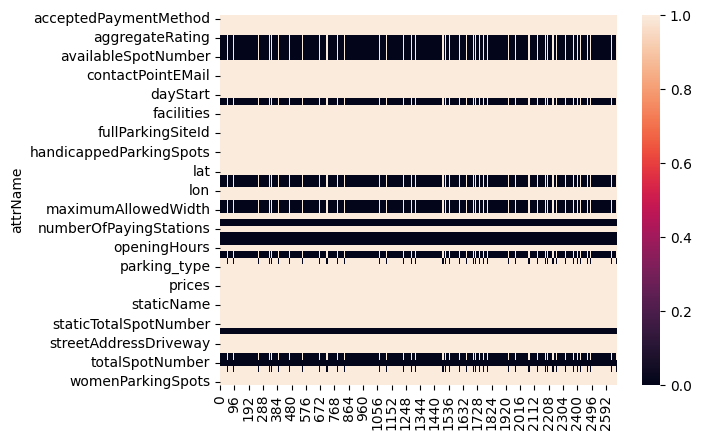

In [78]:
#Show deviating data in heatmap
sns.heatmap(p01_hist_data.isna().transpose())

In [79]:
#What are those deviating rows? The table shows only columns which do not entirely contain Null-values for these special rows.
p01_hist_data[p01_hist_data['status']=='Offen'][['observationDateTime','name','occupiedSpotNumber','parkingSiteId','status','trend','totalSpotNumber']]

attrName,observationDateTime,name,occupiedSpotNumber,parkingSiteId,status,trend,totalSpotNumber
15,2023-07-10T00:50:00.000+00:00,P1 Poststrasse,11.0,1,Offen,0.0,528.0
26,2023-07-10T01:30:00.000+00:00,P1 Poststrasse,11.0,1,Offen,0.0,528.0
34,2023-07-10T01:55:00.000+00:00,P1 Poststrasse,11.0,1,Offen,0.0,528.0
48,2023-07-10T02:50:00.000+00:00,P1 Poststrasse,11.0,1,Offen,0.0,528.0
50,2023-07-10T02:55:00.000+00:00,P1 Poststrasse,11.0,1,Offen,0.0,528.0
...,...,...,...,...,...,...,...
2611,2023-07-16T20:25:00.000+00:00,P1 Poststrasse,55.0,1,Offen,0.0,528.0
2621,2023-07-16T21:10:00.000+00:00,P1 Poststrasse,49.0,1,Offen,0.0,528.0
2630,2023-07-16T21:40:00.000+00:00,P1 Poststrasse,43.0,1,Offen,0.0,528.0
2656,2023-07-16T23:25:00.000+00:00,P1 Poststrasse,41.0,1,Offen,0.0,528.0


### Quality Issue 3: Duplicates
Now let's check the dataset P01 for duplicates:

In [80]:
# Check for duplicates in P01 in Occuppied Spot Number and Observation Date Time, which are most relevant columns for further calculations
p01_hist_data.duplicated(['observationDateTime','occupiedSpotNumber']).sum()

352

There is a huge amout of duplicates, that have to be evaluated and eventually removed.The same check can be done for the P07 dataset:

In [84]:
# Check for duplicates in Occuppied Spot Number and Observation Date Time in P07
p07_hist_data.duplicated(['observationDateTime','occupiedSpotNumber']).sum()

7873

In [86]:
# Check for duplicates including also 'recvTime' Occuppied Spot Number and Observation Date Time in P07
p07_hist_data.duplicated(['recvTime','observationDateTime','occupiedSpotNumber']).sum()

0

In [87]:
#Show duplicated rows in P07
p07_hist_data[p07_hist_data.duplicated(['observationDateTime','occupiedSpotNumber'], keep=False)][['recvTime','observationDateTime','occupiedSpotNumber']]

,recvTime,observationDateTime,occupiedSpotNumber
188,2022-10-28T13:19:30.974Z,2022-10-28T13:19:00.000Z,163
189,2022-10-28T13:20:30.835Z,2022-10-28T13:19:00.000Z,163
588,2022-10-28T19:59:30.932Z,2022-10-28T19:58:00.000Z,22
589,2022-10-28T20:00:30.692Z,2022-10-28T19:58:00.000Z,22
717,2022-10-28T22:08:30.788Z,2022-10-28T22:08:00.000Z,17
...,...,...,...
238163,2023-06-21T12:14:47.355Z,2023-06-13T05:55:00.000Z,48
239883,2023-06-27T05:00:42.332Z,2023-06-27T04:59:00.000Z,72
239884,2023-06-27T05:05:34.120Z,2023-06-27T04:59:00.000Z,72
241629,2023-07-03T08:40:41.362Z,2023-07-03T08:38:00.000Z,180


In [88]:
#Show duplicated rows in P01
p01_hist_data[p01_hist_data.duplicated(['observationDateTime','occupiedSpotNumber'], keep=False)][['observationDateTime','occupiedSpotNumber']]

attrName,observationDateTime,occupiedSpotNumber
2,2023-07-10T00:14:00.000+00:00,11.0
3,2023-07-10T00:14:00.000+00:00,11.0
6,2023-07-10T00:29:00.000+00:00,11.0
7,2023-07-10T00:29:00.000+00:00,11.0
8,2023-07-10T00:34:00.000+00:00,11.0
...,...,...
2643,2023-07-16T22:29:00.000+00:00,41.0
2646,2023-07-16T22:44:00.000+00:00,41.0
2647,2023-07-16T22:44:00.000+00:00,41.0
2661,2023-07-16T23:49:00.000+00:00,41.0


There are a lot of duplicates if we take into account the columns 'observationDateTime' and 'occupiedSpotNumber'. However, if we also integrate the column 'recvTime', we do not see duplicates anymore. This shows, that parking garages sometimes deliver the same data again to the dataplatform and just the receiving time is changing. For our calculations those repeated values are not helpful and therefore can be removed from the dataset.

### Tidiness Issue 1: Inconsistent Time Window

Both tables contain date information in the observationDateTime column. However the datatype is currently set to object and has to be changed to datetime. The spot numbers in the P01-Dataset are stored as object as well and need to be changed to int. We also see, that the P07-dataset has much more rows than the P01-dataset. 

In [89]:
#Dates (ObservationDateTime) in P7
pd.to_datetime(p07_hist_data['observationDateTime']).dt.date

0         2022-10-28
1         2022-10-28
2         2022-10-28
3         2022-10-28
4         2022-10-28
             ...    
245511    2023-07-17
245512    2023-07-17
245513    2023-07-17
245514    2023-07-17
245515    2023-07-17
Name: observationDateTime, Length: 245516, dtype: object

In [90]:
#Dates (ObservationDateTime) in P1
pd.to_datetime(p01_hist_data['observationDateTime']).dt.date

0       2023-07-10
1       2023-07-10
2       2023-07-10
3       2023-07-10
4       2023-07-10
           ...    
2661    2023-07-16
2662    2023-07-16
2663    2023-07-16
2664    2023-07-16
2665    2023-07-16
Name: observationDateTime, Length: 2666, dtype: object

This results from different time windows in both datasets. To make both datasets comparable, it is helpfull to choose the same time window. The following code compares the observationdatetime column between both tables by calculating the minimum and maximum date:

In [91]:
# ObservationDatetime Range in both Datasets
print("Observation Date Range\n")
print(f"ObservationDatetime ranges from {p07_hist_data['observationDateTime'].min()} to {p07_hist_data['observationDateTime'].max()} in the P07 dataset.\n")
print(f"ObservationDatetime ranges from {p01_hist_data['observationDateTime'].min()} to {p01_hist_data['observationDateTime'].max()} in the P01 dataset.")

Observation Date Range

ObservationDatetime ranges from 2022-10-28T10:10:00.000Z to 2023-07-17T10:34:00.000Z in the P07 dataset.

ObservationDatetime ranges from 2023-07-10T00:04:00.000+00:00 to 2023-07-16T23:59:00.000+00:00 in the P01 dataset.


### Tidiness Issue 2: Mixed Observations Range: Parking Garage and Time Series Data

Now we can look at the content and unique values of each column. In both datasets, there are only few columns where values change at all. By looking at the data itself, we can see, that those columns provide information about the parking garage, which is constant over time. Therefore it will be helpful to outsource information about the parking garage to a separate table and keep only values in the history/timeline data, where values can change over time.

In [92]:
# Unique Values in each column of P7
p07_hist_data.nunique()

_id                         245516
recvTime                    245515
fiwareServicePath                1
entityId                         1
entityType                       1
areaServed                       1
maximumAllowedWidth              1
latitude                         1
description                      3
alternateName                    1
observationDateTime         237643
totalAvailableSpotNumber         2
occupiedSpotNumber             473
availableSpotNumber            472
name                             1
maximumAllowedHeight             1
totalSpotNumber                  1
aggregateRating                863
outOfServiceSlotNumber           2
longitude                        1
status                           3
dtype: int64

We can show the numbers of unique data for P01 also by looking at data using the describe method.

In [93]:
#Unique column data in P1
p01_hist_data.describe()

attrName,acceptedPaymentMethod,addressCountry,addressLocality,aggregateRating,alternateName,areaServed,availableSpotNumber,chargingStations,closingHours,contactPointEMail,...,staticTotalSpotNumber,status,streetAddress,streetAddressDriveway,streetAddressExit,totalAvailableSpotNumber,totalSpotNumber,trend,website,womenParkingSpots
count,0,0,0,2356.000000,2356,2356,2356.0,0,0,0,...,0,2666,0,0,0,2356.0,2666.0,310.0,0,0
unique,0,0,0,384.000000,1,1,384.0,0,0,0,...,0,3,0,0,0,1.0,2.0,3.0,0,0
top,NaN,NaN,NaN,3.598485,Poststraße,Zentrum,509.0,NaN,NaN,NaN,...,NaN,spacesAvailable,NaN,NaN,NaN,528.0,592.0,0.0,NaN,NaN
freq,NaN,NaN,NaN,105.000000,2356,2356,105.0,NaN,NaN,NaN,...,NaN,2192,NaN,NaN,NaN,2356.0,2356.0,223.0,NaN,NaN


In [94]:
#Look at 10 sample rows, to get an idea about the content of these columns in P7
p07_hist_data.sample(10)

,_id,recvTime,fiwareServicePath,entityId,entityType,areaServed,maximumAllowedWidth,latitude,description,alternateName,...,totalAvailableSpotNumber,occupiedSpotNumber,availableSpotNumber,name,maximumAllowedHeight,totalSpotNumber,aggregateRating,outOfServiceSlotNumber,longitude,status
197665,197759,2023-05-11T22:06:39.605Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,constant,Kaufhof,...,486,107,379,P7 Kaufhof,215,305,22.016461,-181,8.696387,spacesAvailable
55266,55267,2023-01-31T01:32:31.306Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,constant,Kaufhof,...,486,178,308,P7 Kaufhof,215,305,36.625514,-181,8.696387,spacesAvailable
109814,109815,2023-03-10T23:04:31.14Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,constant,Kaufhof,...,486,192,294,P7 Kaufhof,215,305,39.506173,-181,8.696387,spacesAvailable
80803,80804,2023-02-17T19:44:31.518Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,constant,Kaufhof,...,486,183,303,P7 Kaufhof,215,305,37.654321,-181,8.696387,spacesAvailable
125524,125525,2023-03-21T21:22:30.712Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,constant,Kaufhof,...,486,102,384,P7 Kaufhof,215,305,20.987654,-181,8.696387,spacesAvailable
164177,164242,2023-04-18T13:46:43.698Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,decreasing,Kaufhof,...,486,272,214,P7 Kaufhof,215,305,55.967078,-181,8.696387,spacesAvailable
213510,213604,2023-05-22T22:11:36.532Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,constant,Kaufhof,...,486,109,377,P7 Kaufhof,215,305,22.427984,-181,8.696387,spacesAvailable
56201,56202,2023-01-31T17:07:30.629Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,constant,Kaufhof,...,486,271,215,P7 Kaufhof,215,305,55.761317,-181,8.696387,spacesAvailable
130857,130858,2023-03-26T07:43:36.545Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,increasing,Kaufhof,...,486,120,366,P7 Kaufhof,215,305,24.691358,-181,8.696387,spacesAvailable
30508,30509,2023-01-13T16:37:30.815Z,/main/parking,urn:ngsiv2:OffStreetParking:P007,OffStreetParking,Altstadt,200,49.409425,decreasing,Kaufhof,...,486,280,206,P7 Kaufhof,215,305,57.613169,-181,8.696387,spacesAvailable


In [95]:
#Look at 10 sample rows, to get an idea about the content of these columns in P1
p01_hist_data.sample(10)

attrName,acceptedPaymentMethod,addressCountry,addressLocality,aggregateRating,alternateName,areaServed,availableSpotNumber,chargingStations,closingHours,contactPointEMail,...,staticTotalSpotNumber,status,streetAddress,streetAddressDriveway,streetAddressExit,totalAvailableSpotNumber,totalSpotNumber,trend,website,womenParkingSpots
377,None,None,None,2.651515,Poststraße,Zentrum,514.0,None,None,None,...,None,spacesAvailable,None,None,None,528.0,592.0,None,None,None
1420,None,None,None,26.89394,Poststraße,Zentrum,386.0,None,None,None,...,None,spacesAvailable,None,None,None,528.0,592.0,None,None,None
103,None,None,None,28.030304,Poststraße,Zentrum,380.0,None,None,None,...,None,spacesAvailable,None,None,None,528.0,592.0,None,None,None
106,None,None,None,32.007576,Poststraße,Zentrum,359.0,None,None,None,...,None,spacesAvailable,None,None,None,528.0,592.0,None,None,None
553,None,None,None,64.393936,Poststraße,Zentrum,188.0,None,None,None,...,None,spacesAvailable,None,None,None,528.0,592.0,None,None,None
1595,None,None,None,5.871212,Poststraße,Zentrum,497.0,None,None,None,...,None,spacesAvailable,None,None,None,528.0,592.0,None,None,None
971,None,None,None,55.113636,Poststraße,Zentrum,237.0,None,None,None,...,None,spacesAvailable,None,None,None,528.0,592.0,None,None,None
1132,None,None,None,4.166666,Poststraße,Zentrum,506.0,None,None,None,...,None,spacesAvailable,None,None,None,528.0,592.0,None,None,None
1371,None,None,None,58.333332,Poststraße,Zentrum,220.0,None,None,None,...,None,spacesAvailable,None,None,None,528.0,592.0,None,None,None
1375,None,None,None,None,None,None,None,None,None,None,...,None,Offen,None,None,None,None,528.0,0.0,None,None


## 3. Clean data

In [96]:
# Make copies of the datasets about P01 and P07
p01_hist_data_clean = p01_hist_data.copy()
p07_hist_data_clean = p07_hist_data.copy()

### Quality Issue 1: NULL-Values in several columns and excess data with status 'Offen'
In this step, we delete columns which only contain Null-Values, since they do not deliver any further value to us. I combine this cleaning step with assuring that columns in both datasets coincide to compare them later in the statistics. For the final research question only columns are of interest, which are contained in both datasets.

In [97]:
#Keep only columns which do not completely consist of Null-Values and coinciding columns in both datasets
p01_hist_data_clean = (p01_hist_data_clean[['areaServed', 'maximumAllowedWidth', 'description', 'alternateName'
                                           , 'observationDateTime', 'totalAvailableSpotNumber', 'occupiedSpotNumber', 'availableSpotNumber', 'name'
                                           , 'maximumAllowedHeight', 'totalSpotNumber', 'outOfServiceSlotNumber', 'status']])

#Remove columns latitude, longitude, recvTime, fiwareServicePath, entityId, entityType, aggregateRating from P07-dataset since no corresponding values are available for P01)
p07_hist_data_clean = p07_hist_data_clean.drop(['latitude','longitude','recvTime','fiwareServicePath','entityId','entityType','aggregateRating'], axis=1)


In [98]:
#Check whether all columns have been removed, that consisted of NULL-Values and do not exist in both datasets
p01_hist_data_clean.info()
p07_hist_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2666 entries, 0 to 2665
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   areaServed                2356 non-null   object
 1   maximumAllowedWidth       2356 non-null   object
 2   description               2356 non-null   object
 3   alternateName             2356 non-null   object
 4   observationDateTime       2666 non-null   object
 5   totalAvailableSpotNumber  2356 non-null   object
 6   occupiedSpotNumber        2666 non-null   object
 7   availableSpotNumber       2356 non-null   object
 8   name                      2666 non-null   object
 9   maximumAllowedHeight      2356 non-null   object
 10  totalSpotNumber           2666 non-null   object
 11  outOfServiceSlotNumber    2356 non-null   object
 12  status                    2666 non-null   object
dtypes: object(13)
memory usage: 356.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

The table overview shows, that the excess columns have been removed.

### Quality Issue 2: Deviating rows with status "Offen"

Now let's remove the rows with status 'Offen'. Those rows seem to represent a seperate Parking Area at contain and a differing number of totalAvailableSpots. Therefore they would bias the final statistics in a false way and we better restrict data to the main parking area.

In [99]:
# Remove rows from P01 where status="Offen"
p01_hist_data_clean.drop(p01_hist_data_clean[p01_hist_data_clean['status']=='Offen'].index, inplace=True)

# Recalculate Index
p01_hist_data_clean = p01_hist_data_clean.reset_index(drop=True)

In [100]:
# Validate the cleaning was successful and index 15 is not longer part of the dataset
p01_hist_data_clean.head(20)

attrName,areaServed,maximumAllowedWidth,description,alternateName,observationDateTime,totalAvailableSpotNumber,occupiedSpotNumber,availableSpotNumber,name,maximumAllowedHeight,totalSpotNumber,outOfServiceSlotNumber,status
0,Zentrum,240.0,constant,Poststraße,2023-07-10T00:04:00.000+00:00,528.0,11.0,517.0,P1 Poststraße,180.0,592.0,64.0,spacesAvailable
1,Zentrum,240.0,constant,Poststraße,2023-07-10T00:09:00.000+00:00,528.0,11.0,517.0,P1 Poststraße,180.0,592.0,64.0,spacesAvailable
2,Zentrum,240.0,constant,Poststraße,2023-07-10T00:14:00.000+00:00,528.0,11.0,517.0,P1 Poststraße,180.0,592.0,64.0,spacesAvailable
3,Zentrum,240.0,constant,Poststraße,2023-07-10T00:14:00.000+00:00,528.0,11.0,517.0,P1 Poststraße,180.0,592.0,64.0,spacesAvailable
4,Zentrum,240.0,constant,Poststraße,2023-07-10T00:19:00.000+00:00,528.0,11.0,517.0,P1 Poststraße,180.0,592.0,64.0,spacesAvailable
5,Zentrum,240.0,constant,Poststraße,2023-07-10T00:24:00.000+00:00,528.0,11.0,517.0,P1 Poststraße,180.0,592.0,64.0,spacesAvailable
6,Zentrum,240.0,constant,Poststraße,2023-07-10T00:29:00.000+00:00,528.0,11.0,517.0,P1 Poststraße,180.0,592.0,64.0,spacesAvailable
7,Zentrum,240.0,constant,Poststraße,2023-07-10T00:29:00.000+00:00,528.0,11.0,517.0,P1 Poststraße,180.0,592.0,64.0,spacesAvailable
8,Zentrum,240.0,constant,Poststraße,2023-07-10T00:34:00.000+00:00,528.0,11.0,517.0,P1 Poststraße,180.0,592.0,64.0,spacesAvailable
9,Zentrum,240.0,constant,Poststraße,2023-07-10T00:34:00.000+00:00,528.0,11.0,517.0,P1 Poststraße,180.0,592.0,64.0,spacesAvailable


<AxesSubplot: ylabel='attrName'>

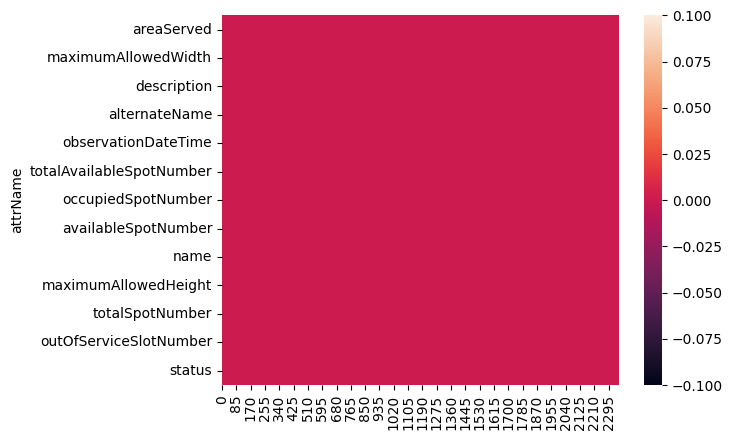

In [101]:
#Show NULL-Values in heatmap after cleaning again
sns.heatmap(p01_hist_data_clean.isna().transpose())

To make further calculations easier, I convert the observationdatetime column to datatype datetime in both table and adjust the SpotNumbers to int, if this want not automatically done during the import.

In [102]:
#Change datatype of observationdate to datetime
p01_hist_data_clean['observationDateTime']=pd.to_datetime(p01_hist_data_clean['observationDateTime'])
p07_hist_data_clean['observationDateTime']=pd.to_datetime(p07_hist_data_clean['observationDateTime'])

In [103]:
#Change datatype of the Spot-Numbers to int
p01_hist_data_clean['totalAvailableSpotNumber']=p01_hist_data_clean['totalAvailableSpotNumber'].astype('int64')
p01_hist_data_clean['totalSpotNumber']=p01_hist_data_clean['totalSpotNumber'].astype('int64')
p01_hist_data_clean['outOfServiceSlotNumber']=p01_hist_data_clean['outOfServiceSlotNumber'].astype('int64')
p01_hist_data_clean['occupiedSpotNumber']=p01_hist_data_clean['occupiedSpotNumber'].astype('int64')
p01_hist_data_clean['totalAvailableSpotNumber']=p01_hist_data_clean['totalAvailableSpotNumber'].astype('int64')
p01_hist_data_clean['availableSpotNumber']=p01_hist_data_clean['availableSpotNumber'].astype('int64')
p01_hist_data_clean['maximumAllowedWidth']=p01_hist_data_clean['maximumAllowedWidth'].astype('int64')
p01_hist_data_clean['maximumAllowedHeight']=p01_hist_data_clean['maximumAllowedHeight'].astype('int64')

In [104]:
#Rename index in P01
p01_hist_data_clean['_id']=p01_hist_data_clean.index

In [105]:
#Test, if datatypes are assigned correctly
#Dates
assert p01_hist_data_clean['observationDateTime'].dtype=='datetime64[ns, UTC]'
assert p07_hist_data_clean['observationDateTime'].dtype=='datetime64[ns, UTC]'
#Integers P01
assert p01_hist_data_clean['totalAvailableSpotNumber'].dtype=='int64'
assert p01_hist_data_clean['totalSpotNumber'].dtype=='int64'
assert p01_hist_data_clean['outOfServiceSlotNumber'].dtype=='int64'
assert p01_hist_data_clean['occupiedSpotNumber'].dtype=='int64'
assert p01_hist_data_clean['totalAvailableSpotNumber'].dtype=='int64'
assert p01_hist_data_clean['availableSpotNumber'].dtype=='int64'
assert p01_hist_data_clean['maximumAllowedWidth'].dtype=='int64'
assert p01_hist_data_clean['maximumAllowedHeight'].dtype=='int64'
#Integers P07
assert p07_hist_data_clean['totalAvailableSpotNumber'].dtype=='int64'
assert p07_hist_data_clean['totalSpotNumber'].dtype=='int64'
assert p07_hist_data_clean['outOfServiceSlotNumber'].dtype=='int64'
assert p07_hist_data_clean['totalAvailableSpotNumber'].dtype=='int64'
assert p07_hist_data_clean['availableSpotNumber'].dtype=='int64'
assert p07_hist_data_clean['maximumAllowedWidth'].dtype=='int64'
assert p07_hist_data_clean['maximumAllowedHeight'].dtype=='int64'

In [106]:
#Visually check Datatypes for both datasets
p01_hist_data_clean.info()
p07_hist_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   areaServed                2356 non-null   object             
 1   maximumAllowedWidth       2356 non-null   int64              
 2   description               2356 non-null   object             
 3   alternateName             2356 non-null   object             
 4   observationDateTime       2356 non-null   datetime64[ns, UTC]
 5   totalAvailableSpotNumber  2356 non-null   int64              
 6   occupiedSpotNumber        2356 non-null   int64              
 7   availableSpotNumber       2356 non-null   int64              
 8   name                      2356 non-null   object             
 9   maximumAllowedHeight      2356 non-null   int64              
 10  totalSpotNumber           2356 non-null   int64              
 11  outOfServiceSlotN

### Quality Issue 3: Duplicates

In [107]:
# Drop Duplicates with Boolean Series which indicates duplicates in each dataset
p01_hist_data_clean.drop_duplicates(subset=['observationDateTime','occupiedSpotNumber'], inplace=True)
p07_hist_data_clean.drop_duplicates(subset=['observationDateTime','occupiedSpotNumber'], inplace=True)

In [108]:
# Test if there are any duplicates in the datasets
assert p01_hist_data_clean.duplicated(['observationDateTime','occupiedSpotNumber']).sum()==0
assert p07_hist_data_clean.duplicated(['observationDateTime','occupiedSpotNumber']).sum()==0

As stated in the assessing section, there are a lot of duplicates if we take into account the columns 'observationDateTime' and 'occupiedSpotNumber'. However, if we also integrate the column 'recvTime', which only existed in the P07-dataset, we do not see duplicates anymore. This shows, that parking garages sometimes deliver the same data again to the dataplatform and just the receiving time is changing. For our calculations those repeated values are not helpful and therefore are now removed from the dataset.

### Tidiness Issue 2: Inconsistent Time Window

As we want to compare both parking garages, it is necessary to look at the same time window in both datasets. For the calculations I decided to compare time series data of the week 2023-07-10 to 2023-07-16. In Dataset P01, I already specified this range while requesting data from the API. The CSV-dataset, however has to be adjusted programatically. The time window of the raw data ranged from 2022-10-28T 10:10 to 2023-07-17 10:34 as shown above. 

In [109]:
'Adjust Time Window of Dataset P07'
p07_hist_data_clean=p07_hist_data_clean[p07_hist_data_clean['observationDateTime']>='2023-07-10']
p07_hist_data_clean=p07_hist_data_clean[p07_hist_data_clean['observationDateTime']<='2023-07-17']

In [110]:
#Check the consistency of the time range of both Datasets
print("Observation Date Range\n")
print(f"ObservationDatetime ranges from {p07_hist_data_clean['observationDateTime'].min()} to {p07_hist_data_clean['observationDateTime'].max()} in the P07 dataset.\n")
print(f"ObservationDatetime ranges from {p01_hist_data_clean['observationDateTime'].min()} to {p01_hist_data_clean['observationDateTime'].max()} in the P01 dataset.")

Observation Date Range

ObservationDatetime ranges from 2023-07-10 00:04:00+00:00 to 2023-07-16 23:59:00+00:00 in the P07 dataset.

ObservationDatetime ranges from 2023-07-10 00:04:00+00:00 to 2023-07-16 23:59:00+00:00 in the P01 dataset.


The ObservationDatetime-Range is now consistent between both datasets.

###  Tidiness Issue 1: Mixed Observations Range, Parking Garage and Time Series Data

Some of the columns provide information about the parking garage, which do not change over time and therefore can be stored in a separate table.
Those columns are:

* areaServed
* maximumAllowedWidth
* alternateName
* name
* maximumAllowedHeight

Further columns of the dataset do also contain only one value, but if we would look at a larger time window, it can be assumed, that those values change from time to time and therefore, the following columns remain in the time series tables.

* totalSpotNumber
* outOfServiceSlotNumber
* totalAvailableSpotNumber


In [111]:
#Show unique values per column in P01
p01_hist_data_clean.nunique()

attrName
areaServed                     1
maximumAllowedWidth            1
description                    3
alternateName                  1
observationDateTime         2005
totalAvailableSpotNumber       1
occupiedSpotNumber           384
availableSpotNumber          384
name                           1
maximumAllowedHeight           1
totalSpotNumber                1
outOfServiceSlotNumber         1
status                         2
_id                         2005
dtype: int64

In [112]:
# Add a column garage number to access outsourced data easily later on
p01_hist_data_clean['garage_number']=1
p07_hist_data_clean['garage_number']=7

#Create seperate garage tables for each Dataset
p01_garage_data=p01_hist_data_clean[['garage_number','name','alternateName','areaServed','maximumAllowedWidth','maximumAllowedHeight']].drop_duplicates()
p07_garage_data=p07_hist_data_clean[['garage_number','name','alternateName','areaServed','maximumAllowedWidth','maximumAllowedHeight']].drop_duplicates()

#Combine garage data
garage_data=pd.concat([p07_garage_data,p01_garage_data], ignore_index=True)
garage_data

,garage_number,name,alternateName,areaServed,maximumAllowedWidth,maximumAllowedHeight
0,7,P7 Kaufhof,Kaufhof,Altstadt,200,215
1,1,P1 Poststraße,Poststraße,Zentrum,240,180


In [113]:
garage_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   garage_number         2 non-null      int64 
 1   name                  2 non-null      object
 2   alternateName         2 non-null      object
 3   areaServed            2 non-null      object
 4   maximumAllowedWidth   2 non-null      int64 
 5   maximumAllowedHeight  2 non-null      int64 
dtypes: int64(3), object(3)
memory usage: 224.0+ bytes


In [114]:
# Drop outsources columns from the time series datasets except the garage_number
p01_hist_data_clean.drop(['name','alternateName','areaServed','maximumAllowedWidth','maximumAllowedHeight'], axis=1, inplace=True)
p07_hist_data_clean.drop(['name','alternateName','areaServed','maximumAllowedWidth','maximumAllowedHeight'], axis=1, inplace=True)

In [115]:
# Check whether all dropped columns are gone now for P01
p01_hist_data_clean.nunique()

attrName
description                    3
observationDateTime         2005
totalAvailableSpotNumber       1
occupiedSpotNumber           384
availableSpotNumber          384
totalSpotNumber                1
outOfServiceSlotNumber         1
status                         2
_id                         2005
garage_number                  1
dtype: int64

In [116]:
#Show columns and unique values for P07 again after cleaning
p07_hist_data_clean.nunique()

_id                         1910
description                    3
observationDateTime         1910
totalAvailableSpotNumber       1
occupiedSpotNumber           208
availableSpotNumber          208
totalSpotNumber                1
outOfServiceSlotNumber         1
status                         2
garage_number                  1
dtype: int64

### **Combine datasets**

Now, that some variables are outsourced to a separate table, lets combine the Time Series Tables for P01 and P07.

In [117]:
hist_data_clean=pd.concat([p01_hist_data_clean,p07_hist_data_clean], ignore_index=True)
hist_data_clean.sample(10)

,description,observationDateTime,totalAvailableSpotNumber,occupiedSpotNumber,availableSpotNumber,totalSpotNumber,outOfServiceSlotNumber,status,_id,garage_number
1723,constant,2023-07-16 00:34:00+00:00,528,54,474,592,64,spacesAvailable,2029,1
1070,decreasing,2023-07-13 18:09:00+00:00,528,154,374,592,64,spacesAvailable,1258,1
2420,constant,2023-07-11 11:19:00+00:00,486,282,204,305,-181,spacesAvailable,244078,7
2575,constant,2023-07-12 00:29:00+00:00,486,164,322,305,-181,spacesAvailable,244233,7
2409,decreasing,2023-07-11 10:24:00+00:00,486,297,189,305,-181,spacesAvailable,244067,7
1270,constant,2023-07-14 10:49:00+00:00,528,368,160,592,64,spacesAvailable,1501,1
2538,constant,2023-07-11 21:24:00+00:00,486,167,319,305,-181,spacesAvailable,244196,7
3270,constant,2023-07-14 18:19:00+00:00,486,216,270,305,-181,spacesAvailable,244959,7
1090,decreasing,2023-07-13 19:49:00+00:00,528,87,441,592,64,spacesAvailable,1280,1
1475,constant,2023-07-15 03:54:00+00:00,528,33,495,592,64,spacesAvailable,1741,1


## 4. Update your data store

To keep the cleaned data I export them to CSV-files with the following code:

In [118]:
#Export Combined Dataset and Garage Table to CSV
hist_data_clean.to_csv('20230710_20230716_parking_hist_data_P01_P07_clean.csv', index=False, encoding='utf-8')
garage_data.to_csv('20230710_20230716_parking_garage_data_P01_P07_clean.csv', index=False, encoding='utf-8')

## 5. Answer the research question

### Research question:
### How do the parking garages P1 and P7 compare in their utilization in the week of July, 10th to 16th, 2023?

In my project I want to compare the parking garage capacity utilization of two different garages P0 and P1 throughout the exemplary week 2023-07-10 - 2023-07-16. Both garages are of very similar size and therefore we can compare them in absolut values.
Both parking garages are of similar size, but serve different districts of the city of Heidelberg. In the first chart we can see the number of occupied spots of each garage throughout the exemplary week. At first glance, we can see, that both garages have daily fluctuations with fewer cars in the mornings and evenings and a high occupation in the middle of the day. 

/tmp/ipykernel_13/2913219201.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'Occuppied Parking Spots in P1 and P7')

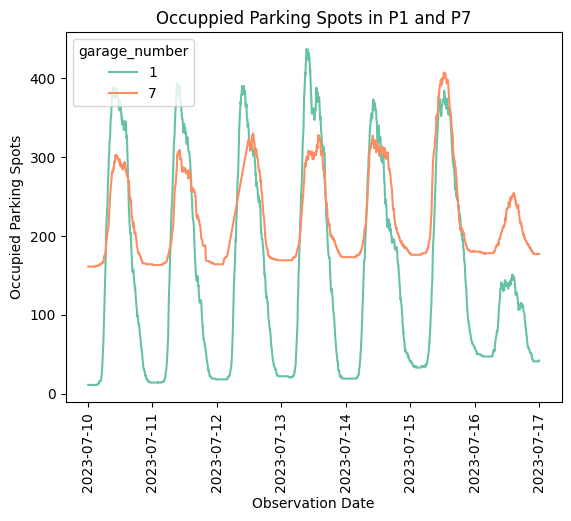

In [119]:
#Capacity Utilization of the two parking garages
chart = sns.lineplot(data=hist_data_clean[['observationDateTime','occupiedSpotNumber','garage_number']]
            , x='observationDateTime'
            , y='occupiedSpotNumber'
            ,palette="Set2"
            , hue='garage_number')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set(xlabel='Observation Date', ylabel='Occupied Parking Spots')
chart.set_title("Occuppied Parking Spots in P1 and P7")

But the garages also show differences. If we put the curves in a chart together, we see, that P07 has a ground level of parking spots which never drops below 161. This might be due to permanently reserved parking spots for corporate clients. In P01 we see that the level of overnight parking was higher during the weekend from Friday evening till Sunday. We also see, that the utilisation of P07 was highest on saturday, while P01 reached the highest occupation on Thursday. 

In [120]:
# Minimum Parking Spot Occupation in P07
p07_min=hist_data_clean[hist_data_clean['garage_number']==7]['occupiedSpotNumber'].min()
# Minimum Parking Spot Occupation in P01
p01_min=hist_data_clean[hist_data_clean['garage_number']==1]['occupiedSpotNumber'].min()
print ((f"Minimum Parking Spot Occupation in P07: {p07_min} \nMinimum Parking Spot Occupation in P01: {p01_min}"))

Minimum Parking Spot Occupation in P07: 161 
Minimum Parking Spot Occupation in P01: 11


Now lets look deeper into the daily fluctuation of occupied parking slots. To visualize the number of parking cars depending on the hour of the day, I calculate the mean occupation of the garage on working days from monday to saturday. I excluded sunday, because the parking behavior on sunday seems to differ largerly from working days and would bias the calculation.

Text(0.5, 0.98, 'Mean occupied spots dep. on hour of the day')

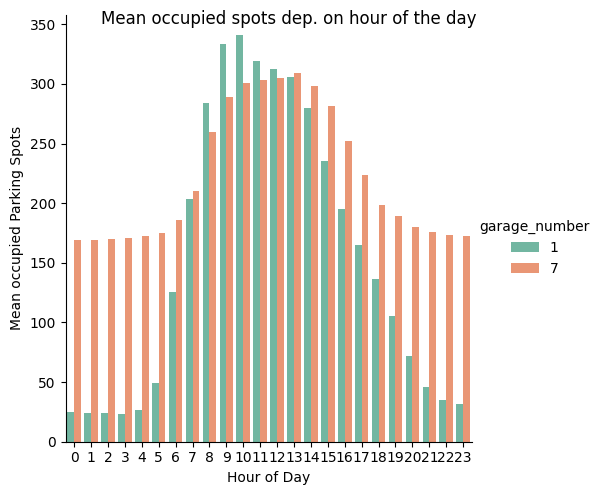

In [121]:
#Mean hourly occupation of the parking garages on working days from Monday to Saturday 
#(Sunday is excluded because of strong deviation in customer behavior as seen in the first chart)

#Add column hour of the day
hist_data_clean['hour']=hist_data_clean.observationDateTime.dt.hour
#Add column day of the week
hist_data_clean['dayofweek']=hist_data_clean.observationDateTime.dt.dayofweek

#Create Chart 
chart= sns.catplot(x="hour"
            ,y="occupiedSpotNumber"
            ,data=hist_data_clean[hist_data_clean['dayofweek'] < 7]
            , kind='bar'
            , estimator="mean"
                   ,palette="Set2"
            , errorbar=None       
            , hue='garage_number')

#Set Label of the x- and y-Axis
chart.set(xlabel='Hour of Day', ylabel='Mean occupied Parking Spots')

#Set Title of the chart
chart.fig.suptitle("Mean occupied spots dep. on hour of the day")

The chart shows, that Parking Garage P1 Poststrasse on average reaches its maximum occupation between 10 and 11 o'clock while P7 Kaufhof reaches its maximum later in the day between 13 and 14 o'clock. The name of garage P7 "Kaufhof" already provides one vague possible explanation for this: "Kaufhof" is a large department store chain in Germany and most shopping malls start their sales at around 10 am and are still closed in the mornings. 

### **5.2:**  Reflection
If I had more time, I would take further parking garages into account and would enlarge the time window from one week to a larger time horizon of for example several years. It would be very interesting to look at seasonal fluctuations in the occupation of parking garages and different areas. I would also try to integrate further datasets, for example about the weather, to see, if parking behavior shows any correlation to the weather conditions. To accomplish this, I would further optimize the datatypes to keep tables as small as possible and for example change object columns to category columns and adjust the integer columns to to smallest possible datatype. I would furthermore add tables, which store the timestamp data in less granular time steps to make calculations faster, when enlarging the time window of the data.